In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../Gridsearch_140820'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

In [ ]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

In [ ]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [ ]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [ ]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [ ]:
big_df = pd.concat(csvs)
big_df.describe()

In [ ]:
big_df['val_acc'].hist(figsize=(10, 10))

In [ ]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [ ]:
best_df = pd.DataFrame(best_rows)

In [ ]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


In [ ]:
print("Dataframe with means for trials")
mean_df = best_df.groupby(by=["learning_rate", "hidden_units", "cost_per_sample", "surprisal_cost"])

In [ ]:
mean_df.min()


In [54]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [ ]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_lr{csvs[i].learning_rate[0]}_hu{csvs[i].hidden_units[0]}.png")

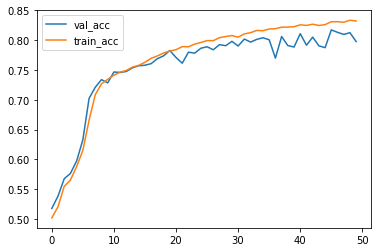

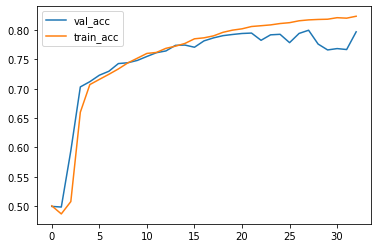

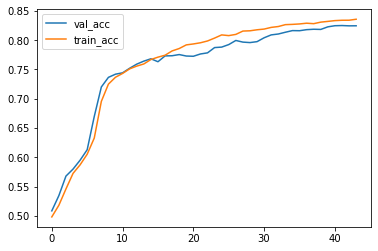

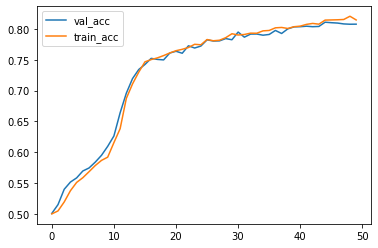

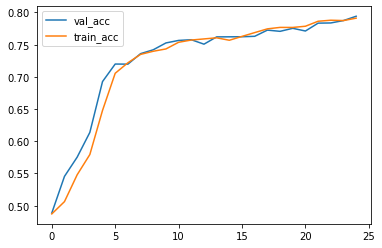

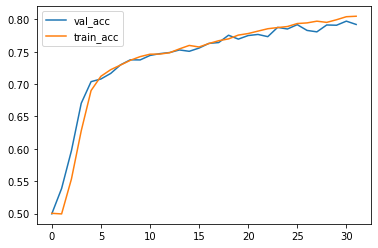

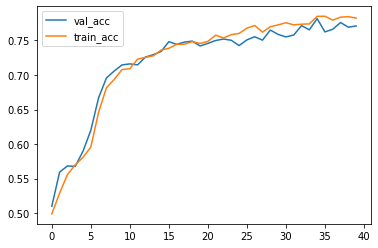

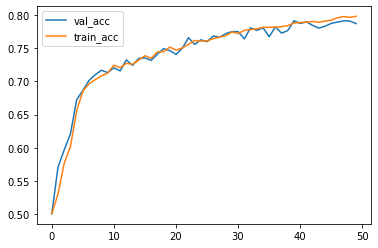

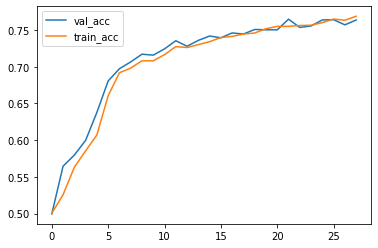

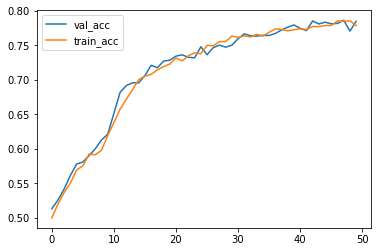

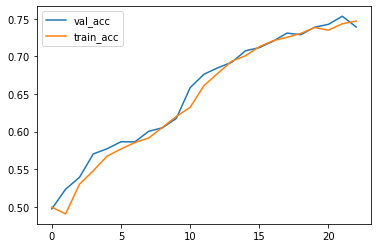

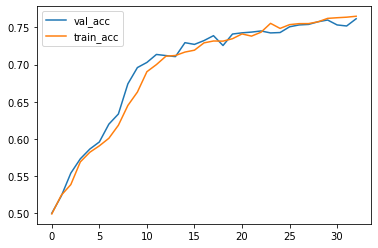

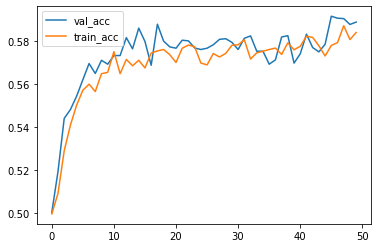

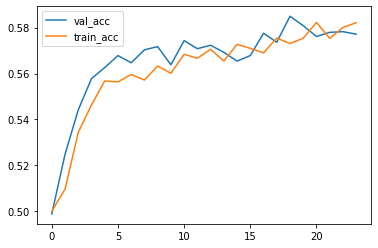

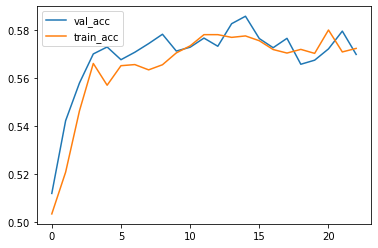

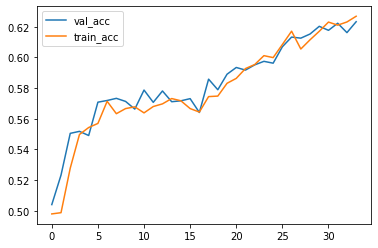

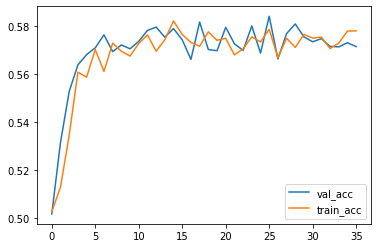

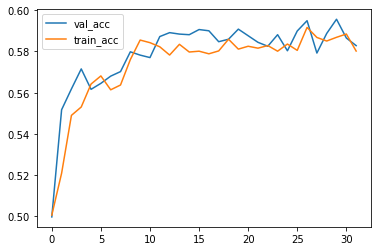

In [55]:
if not os.path.exists(f"{folder}/lrplots"):
    os.makedirs(f"{folder}/lrplots")

for i, df in enumerate(lr0001):
    df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")

In [56]:
csvs[43]

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,early_stopping,val_acc,val_updates,train_acc,train_updates,list_index
0,0,64,0.005,96,0.01,0.005,1,yes,0.499599,1.000000,0.522569,18.495459,43
1,1,64,0.005,96,0.01,0.005,1,yes,0.499599,1.000000,0.529915,1.000000,43
2,2,64,0.005,96,0.01,0.005,1,yes,0.499599,1.000000,0.536325,1.000000,43
3,3,64,0.005,96,0.01,0.005,1,yes,0.499599,3.001903,0.531851,1.262754,43
4,4,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2476.948730,43
5,5,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2520.000000,43
6,6,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2520.000000,43
7,7,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2520.000000,43
8,8,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2520.000000,43
9,9,64,0.005,96,0.01,0.005,1,yes,0.499599,2520.000000,0.500467,2520.000000,43
